In [2]:
import numpy as np
import cv2
import PIL.Image as Image
import os

import matplotlib,pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [4]:
IMAGE_SHAPE = (224, 224)
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [7]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

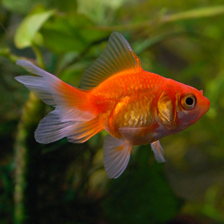

In [9]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)

gold_fish

In [12]:
gold_fish = np.array(gold_fish)/255.0

In [14]:
gold_fish.shape

(224, 224, 3)

In [15]:
# add another dimention to the input, since we pass multiple images to the model 
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [17]:
result = classifier.predict(gold_fish[np.newaxis, ...])

1/1 [==============================] - 0s 41ms/step


In [18]:
result.shape

(1, 1001)

In [19]:
# Get the maximum value result index 
predicted_lable_index = np.argmax(result)
predicted_lable_index

2

In [21]:
# read the labels file, split in line and keep it in an array
with open("ImageNetLabels.txt", 'r') as f:
    image_labels = f.read().splitlines()

image_labels[predicted_lable_index]

'goldfish'

# Load flowers dataset

In [22]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 41s 0us/step


In [23]:
data_dir

'./datasets/flower_photos'

In [25]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [29]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [30]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [31]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

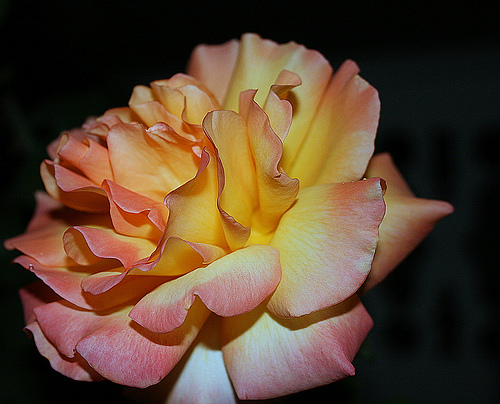

In [35]:
Image.open(roses[100])

In [33]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/5700466891_2bcb17fa68_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14087792403_f34f37ba3b_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/3446285408_4be9c0fded_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/16282277874_b92776b194.jpg'),
 PosixPath('datasets/flower_photos/tulips/8748266132_5298a91dcf_n.jpg')]

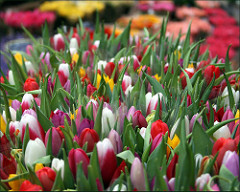

In [36]:
Image.open(tulips[500])

# Read flowers images from disk into numpy array using opencv

In [37]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [45]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [38]:
flowers_images_dict['tulips'][:5]

[PosixPath('datasets/flower_photos/tulips/5700466891_2bcb17fa68_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14087792403_f34f37ba3b_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/3446285408_4be9c0fded_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/16282277874_b92776b194.jpg'),
 PosixPath('datasets/flower_photos/tulips/8748266132_5298a91dcf_n.jpg')]

In [39]:
# images are in PosixPath, change it to str

str(flowers_images_dict['tulips'][0])

'datasets/flower_photos/tulips/5700466891_2bcb17fa68_n.jpg'

## check shape of the images

In [41]:
check_image = cv2.imread(str(flowers_images_dict['tulips'][0]))
check_image.shape

(234, 320, 3)

In [42]:
# to resize the image
cv2.resize(check_image, (244,244)).shape

(244, 244, 3)

## Now re-size all the images put in np array

In [63]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image)) 
        resized_image = cv2.resize(img, (224,224))
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])

In [64]:
X = np.array(X)
y = np.array(y)

# Train test split

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_test[0]

## Preprocessing: scale images

In [66]:
X_train_scaled = X_train / 255
X_test_scaled = X_test/ 255

## Make prediction using pre-trained model on new flowers dataset

In [67]:
X[110].shape

(224, 224, 3)

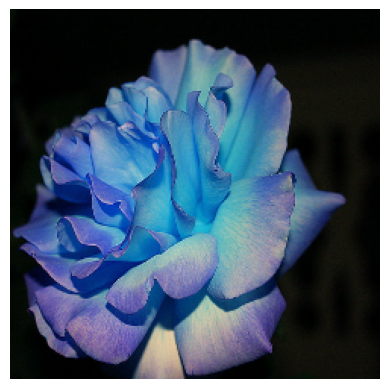

In [56]:
plt.axis('off')
plt.imshow(X[100])

In [61]:
X[1000].shape

(244, 244, 3)

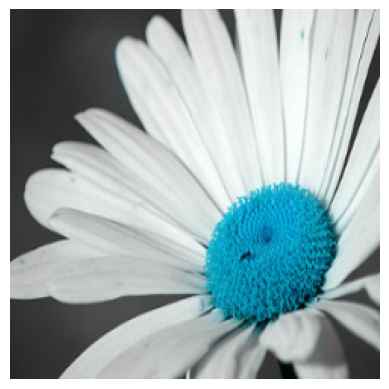

In [57]:
plt.axis('off')
plt.imshow(X[1000])

In [60]:
X[2000].shape

(244, 244, 3)

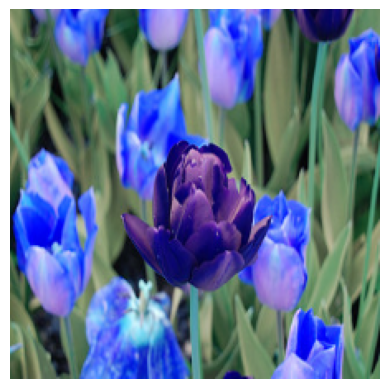

In [73]:
plt.axis('off')
plt.imshow(X[3000])

In [77]:
predicted = classifier.predict(np.array([X[100], X[1000], X[3000]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 71ms/step


array([795, 795, 795])

In [72]:
image_labels[722]

'pillow'

# Now take pre-trained model and retrain it using flowers images

In [78]:
# feature_vector this will give all the pretrained layer except the last layer 
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, 
    input_shape=(224, 224, 3), 
    trainable=False # all the layers will have its fixed weight 
    )

In [79]:
num_of_flowers = 5
model = Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [81]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 41s 445ms/step - loss: 0.8254 - acc: 0.6915
Epoch 2/5
86/86 [==============================] - 39s 451ms/step - loss: 0.4119 - acc: 0.8630
Epoch 3/5
86/86 [==============================] - 39s 451ms/step - loss: 0.3250 - acc: 0.8946
Epoch 4/5
86/86 [==============================] - 39s 457ms/step - loss: 0.2654 - acc: 0.9161
Epoch 5/5
86/86 [==============================] - 41s 475ms/step - loss: 0.2348 - acc: 0.9310


In [82]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 15s 496ms/step - loss: 0.3757 - acc: 0.8802


[0.3757408559322357, 0.8801742792129517]

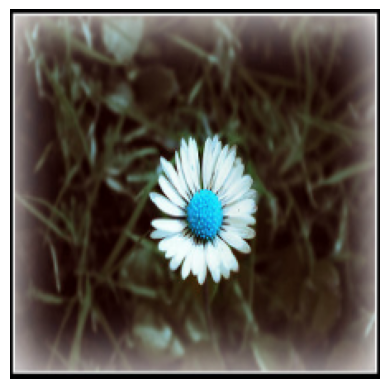

In [87]:
plt.axis('off')
plt.imshow(X_test_scaled[0])

In [89]:
model.predict(X_test_scaled[0])

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 2283, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)
